In [51]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [101]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import glob

In [102]:
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

In [125]:
usgs1 = rxr.open_rasterio('data/USGS_1_n33w119_20130911.tif')

In [120]:
usgs2 = rxr.open_rasterio('data/USGS_1_n34w118_20190917.tif')

In [135]:
usgs3 = rxr.open_rasterio('data/USGS_13_n34w119_20190917.tif')

In [113]:
usgs4 = rxr.open_rasterio('data/USGS_13_n35w118_20190924.tif')

In [114]:
usgs5 = rxr.open_rasterio('data/USGS_13_n35w119_20190919.tif')

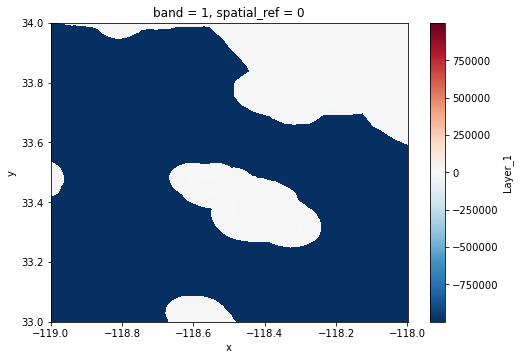

In [136]:
usgs3.plot()

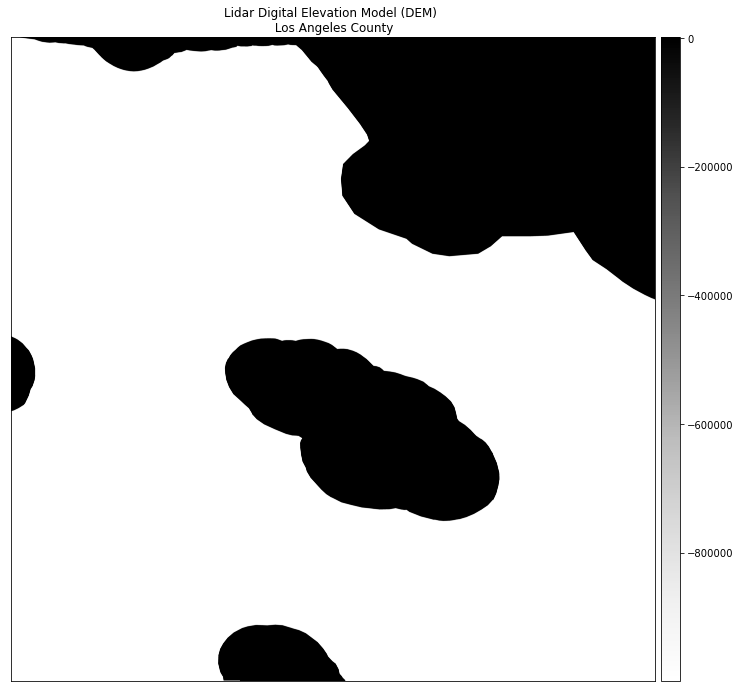

In [139]:
ep.plot_bands(usgs3,
              title="Lidar Digital Elevation Model (DEM) \n Los Angeles County",
              cmap="Greys")

plt.show()

In [137]:
usgs3.min()

<xarray.DataArray ()>
array(-999999.)
Coordinates:
    spatial_ref  int64 0

In [138]:
ep.hist(usgs4,
        figsize=(10, 6))
plt.show()

AttributeError: 'DataArray' object has no attribute 'ravel'

## Prepare USGS files for merge

In [ ]:
# File and folder paths
dirpath = 'data'
out_fp = 'data'

# Make a search criteria to select the DEM files
search_criteria = 'USGS*.tif'

q = os.path.join(dirpath, search_criteria)

print(q)

In [89]:
dems = glob.glob(q)

In [90]:
#create an empty list of arrays
dems_to_merge = []

In [91]:
#create a list of elev files
for f in dems:
    dem = rxr.open_rasterio(f)
    dems_to_merge.append(dem)

In [93]:
dems_to_merge

[<xarray.DataArray (band: 1, y: 3612, x: 3612)>
 [13046544 values with dtype=float32]
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 -119.0 -119.0 -119.0 ... -118.0 -118.0 -118.0
   * y            (y) float64 34.0 34.0 34.0 34.0 34.0 ... 33.0 33.0 33.0 33.0
     spatial_ref  int64 0
 Attributes:
     LAYER_TYPE:                athematic
     RepresentationType:        ATHEMATIC
     STATISTICS_MAXIMUM:        640.54382324219
     STATISTICS_MEAN:           9.0540441653676
     STATISTICS_MINIMUM:        -5.6489400863647
     STATISTICS_STDDEV:         43.346824287551
     STATISTICS_VALID_PERCENT:  99.999
     _FillValue:                -999999.0
     scale_factor:              1.0
     add_offset:                0.0
     long_name:                 Layer_1,
 <xarray.DataArray (band: 1, y: 3612, x: 3612)>
 array([[[ 324.98642,  307.39532, ..., 1079.4043 , 1091.9664 ],
         [ 332.80127,  313.07117, ..., 1068.6528 , 1076.5126 ],
         ...,
         [  

In [92]:
#merge via xarray
rxr_dems = merge_arrays(dems_to_merge)

In [97]:
type(rxr_dems)

xarray.core.dataarray.DataArray

In [98]:
rxr_dems.attrs

{'LAYER_TYPE': 'athematic',
 'RepresentationType': 'ATHEMATIC',
 'STATISTICS_MAXIMUM': 640.54382324219,
 'STATISTICS_MEAN': 9.0540441653676,
 'STATISTICS_MINIMUM': -5.6489400863647,
 'STATISTICS_STDDEV': 43.346824287551,
 'STATISTICS_VALID_PERCENT': 99.999,
 '_FillValue': -999999.0,
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'long_name': 'Layer_1'}

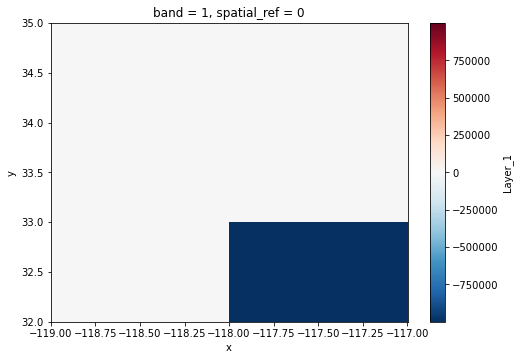

In [94]:
rxr_dems.plot()